In [21]:
from PIL import ImageGrab
import os
screenshot_path = os.path.join(os.getcwd(), 'screenshot', 'screenshot.png')

In [22]:
screenshot = ImageGrab.grab()

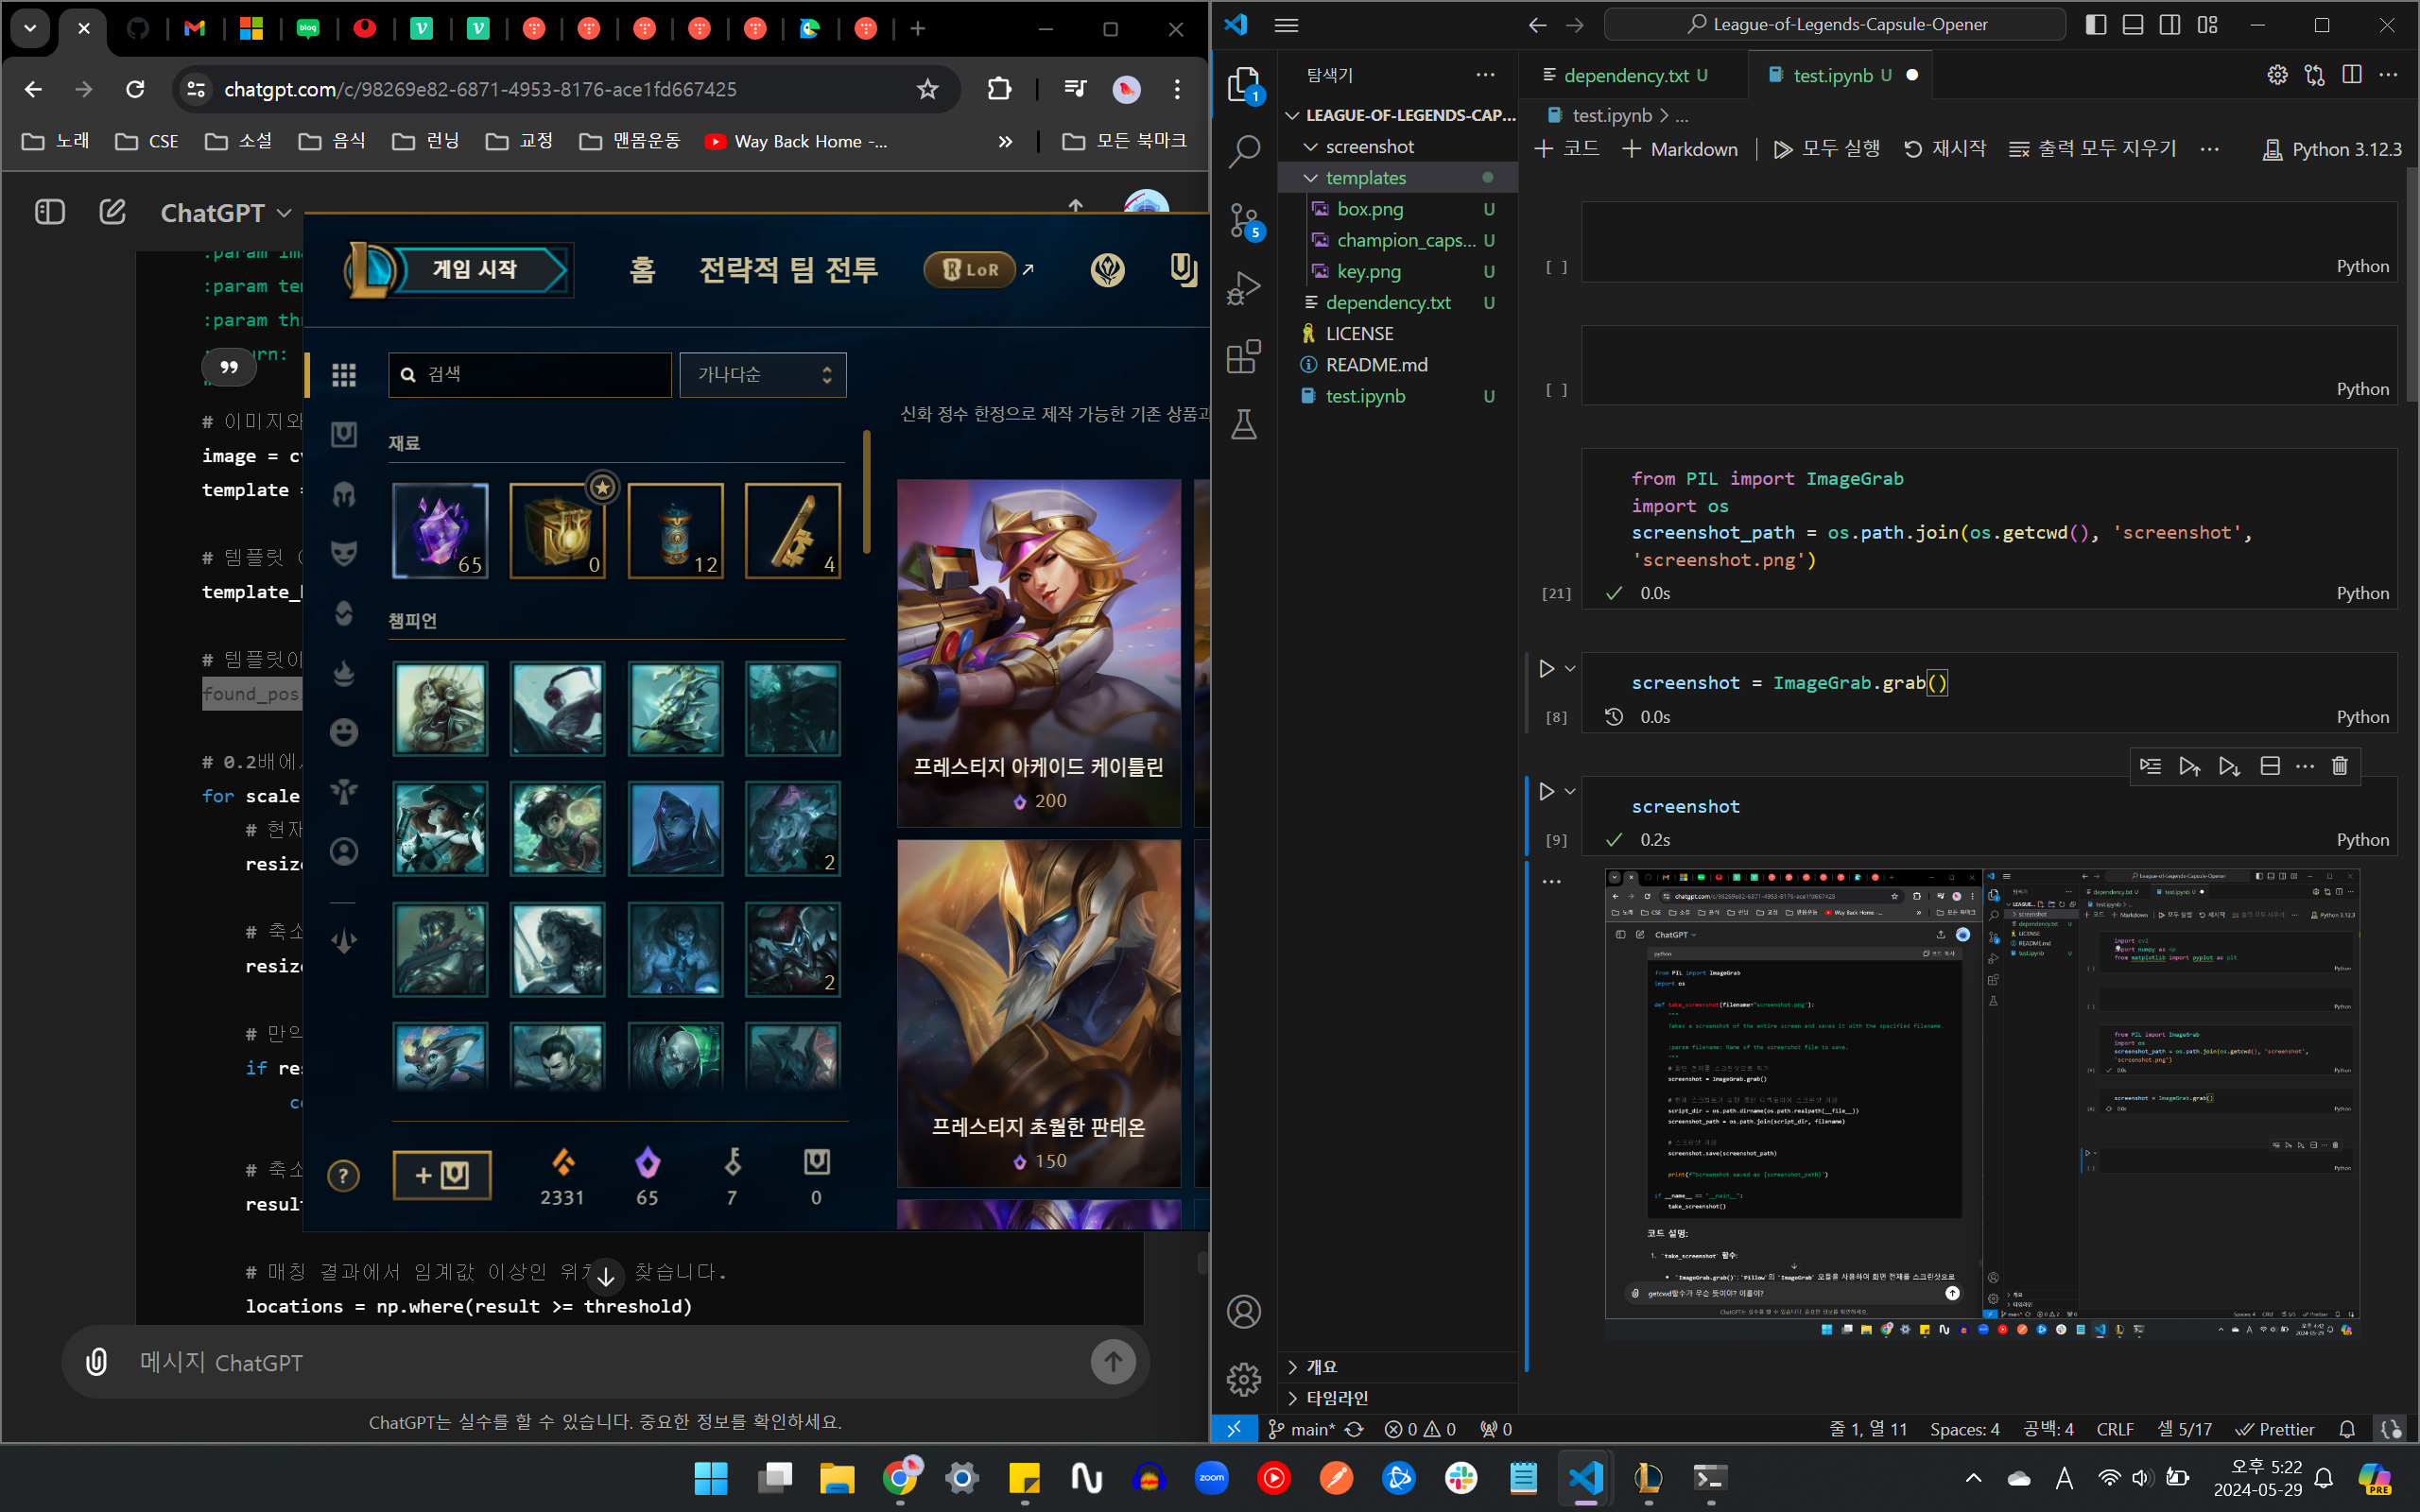

In [23]:
screenshot

In [10]:
screenshot.save(screenshot_path)

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



ModuleNotFoundError: No module named 'matplotlib'

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def find_template_in_image(image_path, template_path):
   
   
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    template = cv2.imread(template_path, cv2.IMREAD_COLOR)

    # 템플릿 이미지의 크기 얻기
    h, w, _ = template.shape

    # 템플릿 매칭 실행
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

    # 매칭 결과에서 최대 값과 위치 찾기
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # 템플릿 위치 표시
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # 원본 이미지에 템플릿 위치 표시
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # 결과 출력
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Max Match Value: {max_val}')
    plt.show()

    # 템플릿 좌표 반환
    return top_left

if __name__ == "__main__":
    # 원본 이미지 경로와 템플릿 이미지 경로
    image_path = 'path/to/your/image.jpg'
    template_path = 'path/to/your/template.jpg'
    
    # 템플릿 찾기
    top_left = find_template_in_image(image_path, template_path)
    print(f'Template found at: {top_left}')

In [ ]:
import cv2
import numpy as np

def find_template_in_image(image_path, template_path, threshold=0.8):

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    template = cv2.imread(template_path, cv2.IMREAD_COLOR)
    template_height, template_width = template.shape[:2]

    found_positions = []

    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        resized_template = cv2.resize(template, (int(template_width * scale), int(template_height * scale)))
        resized_height, resized_width = resized_template.shape[:2]

        if resized_height > image.shape[0] or resized_width > image.shape[1]:
            continue

        result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED)
        locations = np.where(result >= threshold)

        for pt in zip(*locations[::-1]):
            found_positions.append(pt)
            cv2.rectangle(image, pt, (pt[0] + resized_width, pt[1] + resized_height), (0, 255, 0), 2)

    return found_positions, image

if __name__ == "__main__":
    # Paths to the image and the template
    image_path = 'path/to/your/image.jpg'
    template_path = 'path/to/your/template.jpg'

    # Find the template in the image
    positions, annotated_image = find_template_in_image(image_path, template_path)

    if positions:
        print("Template found at positions:", positions)
        cv2.imshow("Detected Template", annotated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Template not found.")


In [15]:
template_path = os.path.join(os.getcwd(), 'templates', 'box.png')

In [16]:
screenshot = cv2.imread(screenshot_path, cv2.IMREAD_COLOR)
template = cv2.imread(template_path, cv2.IMREAD_COLOR)

In [20]:
template_height, template_width = template.shape[:2]

In [24]:
found_positions = []

In [ ]:
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    resized_template = cv2.resize(template, (int(template_width * scale), int(template_height * scale)))
    resized_height, resized_width = resized_template.shape[:2]

    if resized_height > template.shape[0] or resized_width > template.shape[1]:
        continue

    result = cv2.matchTemplate(template, resized_template, cv2.TM_CCOEFF_NORMED)
    locations = np.where(result >= template)

    for pt in zip(*locations[::-1]):
        found_positions.append(pt)
        cv2.rectangle(template, pt, (pt[0] + resized_width, pt[1] + resized_height), (0, 255, 0), 2)

In [25]:
template

array([[[ 29,  14,   3],
        [ 29,  14,   3],
        [ 29,  14,   3],
        ...,
        [ 25,  17,   9],
        [ 19,  10,   1],
        [ 19,  10,   1]],

       [[ 29,  14,   3],
        [ 29,  14,   3],
        [ 29,  14,   3],
        ...,
        [ 94, 113, 118],
        [ 63,  70,  69],
        [ 27,  21,  14]],

       [[ 29,  14,   3],
        [ 29,  14,   3],
        [ 29,  14,   3],
        ...,
        [ 94, 113, 118],
        [ 94, 113, 118],
        [ 90, 108, 112]],

       ...,

       [[ 15,   8,   1],
        [ 15,   8,   1],
        [ 15,   8,   1],
        ...,
        [ 15,   8,   1],
        [ 29,  15,   1],
        [ 29,  15,   1]],

       [[ 29,  15,   1],
        [ 29,  15,   1],
        [ 29,  15,   1],
        ...,
        [ 29,  15,   1],
        [ 29,  15,   1],
        [ 29,  15,   1]],

       [[ 29,  15,   1],
        [ 29,  15,   1],
        [ 29,  15,   1],
        ...,
        [ 29,  15,   1],
        [ 29,  15,   1],
        [ 29,  15,   1]]

In [31]:
np.linspace(0.2, 1.0, 20)

array([0.2       , 0.24210526, 0.28421053, 0.32631579, 0.36842105,
       0.41052632, 0.45263158, 0.49473684, 0.53684211, 0.57894737,
       0.62105263, 0.66315789, 0.70526316, 0.74736842, 0.78947368,
       0.83157895, 0.87368421, 0.91578947, 0.95789474, 1.        ])

In [32]:
template_height

115